In [21]:
library(Matching)
library(tidyverse)
library(TriMatch)
library(ggplot2)
library(cobalt)
library(WeightIt)
library(mlogit)
library(brglm2)
library(MASS)

In [22]:
data_dir <- file.path("..", "data")

In [23]:
full_data <- readRDS(file.path(data_dir, "full_data_ps.rds"))
head(full_data)

,stay_id,hadm_id,subject_id,gender,age,sapsii,icu_intime,icu_outtime,weight,sofa_24hours,⋯,lab_potassium_flag,lab_troponin_flag,lab_po2_flag,lab_lactate_flag,gcs_int,ca_int,event_state_int,mort_28_day_int,ps,ps_weight
,<int>,<int>,<int>,<fct>,<dbl>,<int>,<dttm>,<dttm>,<dbl>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,38302142,20475690,13620446,F,66.04835,31,2159-01-21 01:45:32,2159-01-25 14:09:02,138.0,1,⋯,1,0,1,1,0,1,1,0,0.23004888,1.298784
2,31869153,21383344,15359363,F,41.91122,39,2166-12-02 16:08:45,2166-12-05 02:10:02,70.0,0,⋯,1,0,0,0,1,NA,0,0,0.51034613,1.959454
3,31501167,20944291,12162143,F,87.59137,35,2174-08-05 00:49:12,2174-08-06 16:13:22,65.0,1,⋯,1,0,1,1,0,1,0,0,0.06373611,1.068075
4,39256124,24959920,18226317,M,66.88656,28,2130-11-20 19:28:29,2130-11-25 12:42:59,88.0,3,⋯,1,0,0,0,0,1,0,0,0.06686745,1.071659
5,31132695,28164203,15928453,F,44.39155,55,2113-05-24 00:14:32,2113-05-29 14:24:45,45.9,10,⋯,1,0,1,1,0,1,1,0,0.04697845,1.049294
6,39784690,23246205,16810503,M,56.61848,30,2149-08-14 21:32:37,2149-08-21 12:15:14,80.0,3,⋯,1,0,1,1,0,1,0,0,0.03507564,1.036351


In [24]:
set.seed(4958)

In [25]:

head(full_data)

,stay_id,hadm_id,subject_id,gender,age,sapsii,icu_intime,icu_outtime,weight,sofa_24hours,⋯,lab_potassium_flag,lab_troponin_flag,lab_po2_flag,lab_lactate_flag,gcs_int,ca_int,event_state_int,mort_28_day_int,ps,ps_weight
,<int>,<int>,<int>,<fct>,<dbl>,<int>,<dttm>,<dttm>,<dbl>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,38302142,20475690,13620446,F,66.04835,31,2159-01-21 01:45:32,2159-01-25 14:09:02,138.0,1,⋯,1,0,1,1,0,1,1,0,0.23004888,1.298784
2,31869153,21383344,15359363,F,41.91122,39,2166-12-02 16:08:45,2166-12-05 02:10:02,70.0,0,⋯,1,0,0,0,1,NA,0,0,0.51034613,1.959454
3,31501167,20944291,12162143,F,87.59137,35,2174-08-05 00:49:12,2174-08-06 16:13:22,65.0,1,⋯,1,0,1,1,0,1,0,0,0.06373611,1.068075
4,39256124,24959920,18226317,M,66.88656,28,2130-11-20 19:28:29,2130-11-25 12:42:59,88.0,3,⋯,1,0,0,0,0,1,0,0,0.06686745,1.071659
5,31132695,28164203,15928453,F,44.39155,55,2113-05-24 00:14:32,2113-05-29 14:24:45,45.9,10,⋯,1,0,1,1,0,1,1,0,0.04697845,1.049294
6,39784690,23246205,16810503,M,56.61848,30,2149-08-14 21:32:37,2149-08-21 12:15:14,80.0,3,⋯,1,0,1,1,0,1,0,0,0.03507564,1.036351


In [26]:
library(cobalt)
library(ggplot2)

In [27]:
ps_matches <- Match(Y = full_data$mort_28_day_int, Tr = full_data$gcs_int,
                    X = full_data$ps, M = 1, estimand = "ATT", caliper = 0.05,
                    exact = FALSE, replace = FALSE, ties = FALSE)

summary(ps_matches)



Estimate...  0 
SE.........  0.020322 
T-stat.....  0 
p.val......  1 

Original number of observations..............  4401 
Original number of treated obs...............  533 
Matched number of observations...............  451 
Matched number of observations  (unweighted).  451 

Number of obs dropped by 'exact' or 'caliper'  82 



Warning message:
"Missing values exist in the covariates. Displayed values omit these observations."
Note: `s.d.denom` not specified; assuming "pooled".
Warning message:
"No aggregation will take place, so `agg.fun` will be ignored. Remember to set `which.<ARG> = .none` to aggregate across <ARG>."


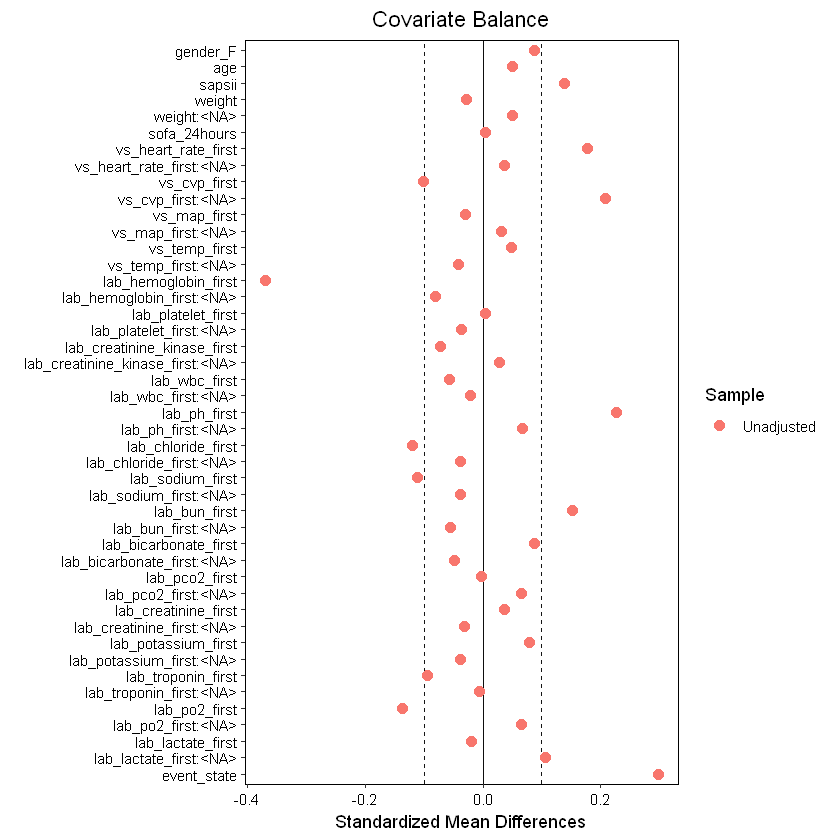

In [28]:
library(MatchIt)

# 提取协变量公式的右侧部分
fml <- as.formula("gcs_int ~ gender + age + sapsii + weight + sofa_24hours + vs_heart_rate_first + vs_cvp_first + vs_map_first + vs_temp_first + lab_hemoglobin_first + lab_platelet_first + lab_creatinine_kinase_first + lab_wbc_first + lab_ph_first + lab_chloride_first + lab_sodium_first + lab_bun_first + lab_bicarbonate_first + lab_pco2_first + lab_creatinine_first + lab_potassium_first + lab_troponin_first + lab_po2_first + lab_lactate_first + event_state")

# 使用MatchBalance创建一个balance对象
balance <- cobalt::bal.tab(x = fml, 
                           treat = full_data$treatment_indicator,  # 确保这是一个二元治疗指标
                           m.out = ps_matches, 
                           data = full_data, 
                           un = TRUE, 
                           adj = TRUE, # 添加这个参数以包含未匹配的结果
                           m.threshold = 0.1,  # 设置标准化均值差阈值为0.1
                           agg.fun="range",
                           binary="std",
                           disp.v = "love.plot")

# 绘制love.plot
# 绘制love.plot
cobalt::love.plot(balance, 
                  threshold = 0.1, 
                  agg.fun = "range",
                  binary = "std",
                  imp = TRUE)

In [29]:
ps_matches_df <-
full_data[ps_matches$index.treated, "stay_id", drop = FALSE] %>%
mutate(match = full_data[ps_matches$index.control, "stay_id"]) %>%
rename(trtd = stay_id, ctrl = match) %>%
mutate(match = 1:n()) %>%
gather("group", "stay_id", trtd, ctrl) %>%
dplyr::select(stay_id, group, match) %>%
arrange(group, match)

ps_matches_df


stay_id,group,match
<int>,<chr>,<int>
35119191,ctrl,1
31861835,ctrl,2
37322694,ctrl,3
33778687,ctrl,4
31604497,ctrl,5
32703334,ctrl,6
30117329,ctrl,7
38888871,ctrl,8
38320178,ctrl,9


In [30]:
# saveRDS(ps_matches, file = file.path(data_dir, "ps_matches.rds"))
data.table::fwrite(ps_matches_df, file.path(data_dir, "ps_matches_df.csv"))



In [31]:
ids <- full_data[unlist(ps_matches[c("index.control", "index.treated")]), "stay_id"]
length(ids) / 2
head(ids)

[1] 451

[1] 35119191 31861835 37322694 33778687 31604497 32703334

In [32]:
data.table::fwrite(data.frame(stay_id = ids), file = file.path(data_dir, "ps_stay_id"))

In [33]:
summary(ps_matches)


Estimate...  0 
SE.........  0.020322 
T-stat.....  0 
p.val......  1 

Original number of observations..............  4401 
Original number of treated obs...............  533 
Matched number of observations...............  451 
Matched number of observations  (unweighted).  451 

Number of obs dropped by 'exact' or 'caliper'  82 



In [34]:
outcome <- data.frame(gcs_pt = full_data$mort_28_day_int[ps_matches$index.treated],
                      match_pt = full_data$mort_28_day_int[ps_matches$index.control])




In [35]:
head(outcome)

,gcs_pt,match_pt
,<int>,<int>
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0


In [36]:
tab <- table(outcome$gcs_pt, outcome$match_pt, dnn = c("Gcs", "Non-Gcs"))
tab
tab[2, 1] / tab[1, 2]
paste("95% Confint",
      round(exp(c(log(tab[2, 1] / tab[1, 2]) - qnorm(0.975) * sqrt(1 / tab[1, 2] + 1 / tab[2, 1]),
                  log(tab[2, 1] / tab[1, 2]) + qnorm(0.975) * sqrt(1 / tab[1, 2] + 1 / tab[2, 1]))), 7))
mcnemar.test(tab) # for 1-1 pairs

   Non-Gcs
Gcs   0   1
  0 359  42
  1  42   8

[1] 1

[1] "95% Confint 0.6520075" "95% Confint 1.5337247"


	McNemar's Chi-squared test

data:  tab
McNemar's chi-squared = 0, df = 1, p-value = 1


In [37]:
(tab[2, 2] + tab[1, 2]) / sum(tab)
(tab[2, 2] + tab[2, 1]) / sum(tab)

[1] 0.1108647

[1] 0.1108647

In [38]:
mortality <- data.frame(gcs = c(0, 1),
                        mortality = c((tab[2, 2] + tab[1, 2]) / sum(tab),
                                      (tab[2, 2] + tab[2, 1]) / sum(tab)))
mortality

gcs,mortality
<dbl>,<dbl>
0,0.1108647
1,0.1108647


In [39]:


mort_fmt <- mortality %>%
mutate(gcs = case_when(
    gcs == 0 ~ "Non_gcs",
    gcs == 1 ~ "gcs"
)) %>%
dplyr::select(gcs, mortality) %>%
spread(gcs, mortality) %>%
mutate(Method = "PS Match") %>%
dplyr::select(Method, gcs, Non_gcs)

mort_fmt

Method,gcs,Non_gcs
<chr>,<dbl>,<dbl>
PS Match,0.1108647,0.1108647


In [40]:
data.table::fwrite(mort_fmt, file.path(data_dir, "mort_ps.csv"))